### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
# Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
display(application_df.shape, application_df.head())

(34299, 12)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [21]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [22]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [23]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot: title={'center': 'Knee Point of APPLICATION_TYPE Counts'}, xlabel='APPLICATION_TYPE'>

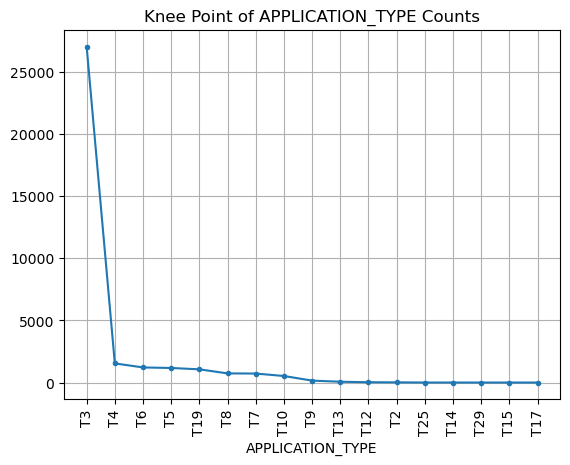

In [24]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.line(xlabel='APPLICATION_TYPE', title='Knee Point of APPLICATION_TYPE Counts', \
  xticks=range(0, len(app_counts)), rot=90, marker='.', grid=True)

In [25]:
# Determine which values to replace if counts are less than 528
replace_application = app_counts[app_counts < 737].index

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
Other     1529
T6        1216
T5        1173
T19       1065
T8         737
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Look at CLASSIFICATION value counts for binning
clf_counts = application_df.CLASSIFICATION.value_counts()
clf_counts[0:10]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

<AxesSubplot: title={'center': 'Density Plot of CLASSIFICATION Counts'}, ylabel='Density'>

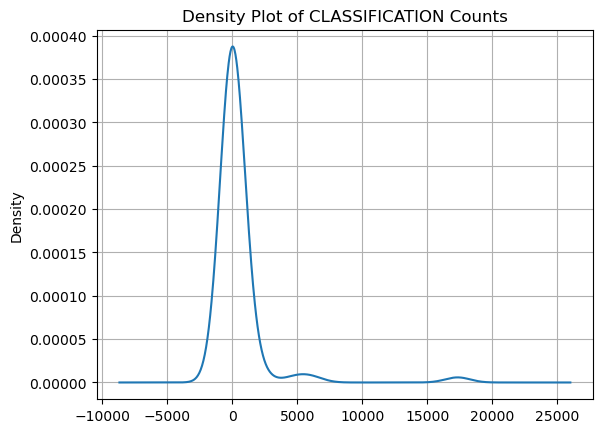

In [27]:
# Visualize the value counts of CLASSIFICATION
clf_counts.plot.density(title='Density Plot of CLASSIFICATION Counts', grid=True)

In [28]:
# Determine which values to replace if counts are less than 1000
replace_class = clf_counts[clf_counts < 1000].index

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [29]:
# Check the number of unique values in each column after binning optimization
application_df.nunique()

APPLICATION_TYPE             7
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [30]:
# Generate our categorical variable lists
# list() is optional because all categorical elements are homogeneous and of the same data type (object).
application_cat = list(application_df.select_dtypes(include=['object']).columns)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [31]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
display(application_df.shape, application_df.head())

(34299, 42)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Optimize numeric columns
int_cols = list(application_df.select_dtypes(include=['int']).columns)
application_df[int_cols].describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


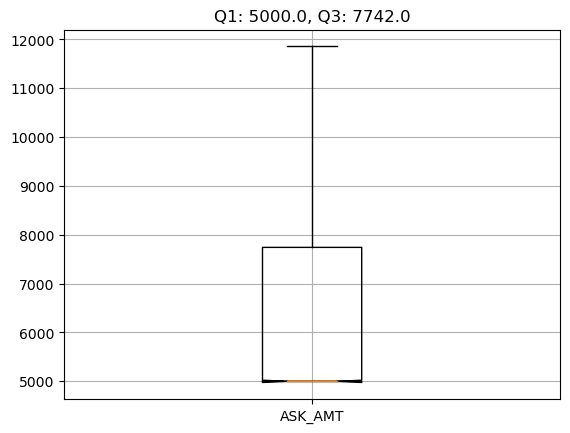

In [34]:
# Create a box-and-whisker plot for int columns
plt_data = application_df[int_cols[1]]
fig, ax = plt.subplots()
boxplt = ax.boxplot(plt_data, labels=[int_cols[1]], showfliers=False, showcaps=True, notch=True, widths=0.2)
# print the 1st and 3rd quartile
iqrs = [item.get_ydata() for item in boxplt['whiskers']]
ax.set_title(f'Q1: {iqrs[:2][0][0]}, Q3: {iqrs[:2][1][0]}')
ax.grid()
# Save the figure.
plt.savefig('./Data/ASK_AMT_notshowfliers_boxplot.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

In [35]:
# remove fliers (accuracy ~ 75.5%)
q3, q1 = plt_data.quantile([0.75, 0.25])
stddev = plt_data.std()
application_df = application_df[plt_data <= (q3 + 1.5*(q3-q1))]
# application_df = application_df[np.abs((plt_data - plt_data.mean())) <= (3*stddev)]
application_df.shape

(26093, 42)

In [36]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Compile, Train and Evaluate the Model with Optimized Hidden Layer & Neurons per Layer

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_input_features = len(X_train_scaled[0])
n_hidden_layer1 = round(0.9 * n_input_features)
n_hidden_layer2 = round(0.5 * n_input_features)
n_hidden_layer3 = round(0.9 * n_input_features)
# Define the model epoch and callback's saving period
epochn = 500
periodn = 25

# Reusable func to easily eval nn model (nodes*: number of nodes in each hidden layer, actf*: activation function)
def eval_nn(n1=n_hidden_layer1, n2=n_hidden_layer2, n3=n_hidden_layer3, actf1='tanh', actf2='', actf3='', epochn=epochn):
    # define nn model
    nn = tf.keras.models.Sequential()

    # First hidden layer
    if actf1.lower().startswith('leaky'):
        nn.add(tf.keras.layers.Dense(units=n1, input_dim=n_input_features, activation=LeakyReLU(alpha=0.01)))
    else:
        nn.add(tf.keras.layers.Dense(units=n1, input_dim=n_input_features, activation=actf1))

    # Second hidden layer
    if actf2 != '':
        if actf2.lower().startswith('leaky'):
            nn.add(tf.keras.layers.Dense(units=n2, activation=LeakyReLU(alpha=0.01)))
        else:
            nn.add(tf.keras.layers.Dense(units=n2, activation=actf2))
    else:
        n2 = ''

    # Third hidden layer
    if actf3 != '':
        if actf3.lower().startswith('leaky'):
            nn.add(tf.keras.layers.Dense(units=n3, activation=LeakyReLU(alpha=0.01)))
        else:
            nn.add(tf.keras.layers.Dense(units=n3, activation=actf3))
    else:
        n3 = ''

    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Check the structure of the model
    print(n_input_features, n1, n2, n3)
    nn_sum = nn.summary()
    return (nn, nn_sum, n1, n2, n3, actf1, actf2, actf3, epochn)

In [39]:
# Eval nn model using default nodes of 1.9x/0.8x inputs in hidden layer1-3, default activation function relu+relu+sigmoid
nn, nn_sum, n1, n2, n3, actf1, actf2, actf3, epochn = eval_nn()

41 37  
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                1554      
                                                                 
 dense_1 (Dense)             (None, 1)                 38        
                                                                 
Total params: 1,592
Trainable params: 1,592
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Define the checkpoint path and filenames
checkpoint_path = "checkpoints_dnn_" + actf1
os.makedirs(checkpoint_path, exist_ok=True)
checkpoint_files = checkpoint_path + "/weights_{epoch:03d}.hdf5"

In [41]:
# Compile the model
# adam = Adam(learning_rate=0.01, epsilon=1e-08)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mse"])
print(nn.optimizer.get_config())
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq='epoch', period=periodn)

{'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


In [42]:
# Train the model (with ModelCheckpoint)
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochn, callbacks=[cp_callback])

Epoch 1/500
612/612 [==============================] - 4s 2ms/step - loss: 0.5740 - accuracy: 0.7242 - mse: 0.1942
Epoch 2/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5517 - accuracy: 0.7421 - mse: 0.1845
Epoch 3/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7432 - mse: 0.1812
Epoch 4/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7443 - mse: 0.1792
Epoch 5/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.7458 - mse: 0.1780
Epoch 6/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7454 - mse: 0.1776
Epoch 7/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7453 - mse: 0.1770
Epoch 8/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7478 - mse: 0.1766
Epoch 9/500
612/612 [==============================] - 1s 2ms/step - loss: 0.530

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, MSE: {model_mse}")

204/204 - 1s - loss: 0.5391 - accuracy: 0.7488 - mse: 0.1778 - 594ms/epoch - 3ms/step
Loss: 0.5391294360160828, Accuracy: 0.7487737536430359, MSE: 0.17777030169963837


In [44]:
# Export our model to HDF5 file
nn.save(checkpoint_path + "/AlphabetSoupCharity_Optimization.h5")

In [45]:
# Create a DataFrame containing training history
history1_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
legend1 = f'{actf1}{n1}_{actf2}{n2}_{actf3}{n3}_sigmoid'

### Deliverable 3: DNN Model using 2 hidden layer tanh

In [46]:
# Eval nn model using default nodes of 1.9x/0.8x inputs in hidden layer1/2, default activation function relu+relu+sigmoid
nn, nn_sum, n1, n2, n3, actf1, actf2, actf3, epochn = eval_nn(n_hidden_layer1, n_hidden_layer2, n_hidden_layer3, 'tanh', 'tanh', '')

41 37 20 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 37)                1554      
                                                                 
 dense_3 (Dense)             (None, 20)                760       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,335
Trainable params: 2,335
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Define the checkpoint path and filenames
checkpoint_path = "checkpoints_dnn_" + actf1
os.makedirs(checkpoint_path, exist_ok=True)
checkpoint_files = checkpoint_path + "/weights_{epoch:03d}.hdf5"

In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mse"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq='epoch', period=periodn)

In [49]:
# Train the model (with ModelCheckpoint)
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochn, callbacks=[cp_callback])

Epoch 1/500
612/612 [==============================] - 2s 2ms/step - loss: 0.5670 - accuracy: 0.7253 - mse: 0.1911
Epoch 2/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5427 - accuracy: 0.7432 - mse: 0.1809
Epoch 3/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5374 - accuracy: 0.7442 - mse: 0.1789
Epoch 4/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7453 - mse: 0.1777
Epoch 5/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7460 - mse: 0.1774
Epoch 6/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7453 - mse: 0.1768
Epoch 7/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.7459 - mse: 0.1764
Epoch 8/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7483 - mse: 0.1760
Epoch 9/500
612/612 [==============================] - 1s 2ms/step - loss: 0.528

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, MSE: {model_mse}")

204/204 - 0s - loss: 0.5455 - accuracy: 0.7479 - mse: 0.1784 - 401ms/epoch - 2ms/step
Loss: 0.5455296635627747, Accuracy: 0.7478540539741516, MSE: 0.17839764058589935


In [51]:
# Export our model to HDF5 file
nn.save(checkpoint_path + "/AlphabetSoupCharity_Optimization.h5")

In [52]:
# Create a DataFrame containing training history
history2_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
legend2 = f'{actf1}{n1}_{actf2}{n2}_{actf3}{n3}_sigmoid'

### Deliverable 3: DNN Model using 3 hidden layers tanh

In [53]:
# Eval nn model using default nodes of 1.9x/0.8x inputs in hidden layer1/2, default activation function relu+relu+sigmoid
nn, nn_sum, n1, n2, n3, actf1, actf2, actf3, epochn = eval_nn(n_hidden_layer1, n_hidden_layer2, n_hidden_layer3, 'tanh', 'tanh', 'tanh')

41 37 20 37
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 37)                1554      
                                                                 
 dense_6 (Dense)             (None, 20)                760       
                                                                 
 dense_7 (Dense)             (None, 37)                777       
                                                                 
 dense_8 (Dense)             (None, 1)                 38        
                                                                 
Total params: 3,129
Trainable params: 3,129
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Define the checkpoint path and filenames
checkpoint_path = "checkpoints_dnn_" + actf1
os.makedirs(checkpoint_path, exist_ok=True)
checkpoint_files = checkpoint_path + "/weights_{epoch:03d}.hdf5"

In [55]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mse"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq='epoch', period=periodn)

In [56]:
# Train the model (with ModelCheckpoint)
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochn, callbacks=[cp_callback])

Epoch 1/500
612/612 [==============================] - 2s 2ms/step - loss: 0.5630 - accuracy: 0.7346 - mse: 0.1891
Epoch 2/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.7420 - mse: 0.1809
Epoch 3/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5379 - accuracy: 0.7439 - mse: 0.1791
Epoch 4/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7436 - mse: 0.1783
Epoch 5/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7446 - mse: 0.1774
Epoch 6/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7450 - mse: 0.1771
Epoch 7/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7447 - mse: 0.1769
Epoch 8/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7469 - mse: 0.1765
Epoch 9/500
612/612 [==============================] - 1s 2ms/step - loss: 0.530

In [57]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, MSE: {model_mse}")

204/204 - 0s - loss: 0.5498 - accuracy: 0.7485 - mse: 0.1785 - 395ms/epoch - 2ms/step
Loss: 0.5498380064964294, Accuracy: 0.748467206954956, MSE: 0.17848847806453705


In [58]:
# Export our model to HDF5 file
nn.save(checkpoint_path + "/AlphabetSoupCharity_Optimization.h5")

In [59]:
# Create a DataFrame containing training history
history3_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
legend3 = f'{actf1}{n1}_{actf2}{n2}_{actf3}{n3}_sigmoid'

### Deliverable 3: DNN Model using 3 hidden layers tanh and softmax

In [60]:
# Eval nn model using default nodes of 1.9x/0.8x inputs in hidden layer1/2, default activation function relu+relu+sigmoid
nn, nn_sum, n1, n2, n3, actf1, actf2, actf3, epochn = eval_nn(n_hidden_layer1, n_hidden_layer2, n_hidden_layer3, 'tanh', 'tanh', 'softmax')

41 37 20 37
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 37)                1554      
                                                                 
 dense_10 (Dense)            (None, 20)                760       
                                                                 
 dense_11 (Dense)            (None, 37)                777       
                                                                 
 dense_12 (Dense)            (None, 1)                 38        
                                                                 
Total params: 3,129
Trainable params: 3,129
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Define the checkpoint path and filenames
checkpoint_path = "checkpoints_dnn_" + actf1
os.makedirs(checkpoint_path, exist_ok=True)
checkpoint_files = checkpoint_path + "/weights_{epoch:03d}.hdf5"

In [62]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mse"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq='epoch', period=periodn)

In [63]:
# Train the model (with ModelCheckpoint)
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochn, callbacks=[cp_callback])

Epoch 1/500
612/612 [==============================] - 2s 2ms/step - loss: 0.6007 - accuracy: 0.7282 - mse: 0.2052
Epoch 2/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7449 - mse: 0.1856
Epoch 3/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.7459 - mse: 0.1815
Epoch 4/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7466 - mse: 0.1800
Epoch 5/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7474 - mse: 0.1792
Epoch 6/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5392 - accuracy: 0.7483 - mse: 0.1785
Epoch 7/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7481 - mse: 0.1780
Epoch 8/500
612/612 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7479 - mse: 0.1775
Epoch 9/500
612/612 [==============================] - 1s 2ms/step - loss: 0.535

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, MSE: {model_mse}")

204/204 - 0s - loss: 0.5600 - accuracy: 0.7491 - mse: 0.1786 - 425ms/epoch - 2ms/step
Loss: 0.5600235462188721, Accuracy: 0.7490803003311157, MSE: 0.178641676902771


In [65]:
# Export our model to HDF5 file
nn.save(checkpoint_path + "/AlphabetSoupCharity_Optimization.h5")

In [66]:
# Create a DataFrame containing training history
history4_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
legend4 = f'{actf1}{n1}_{actf2}{n2}_{actf3}{n3}_sigmoid'

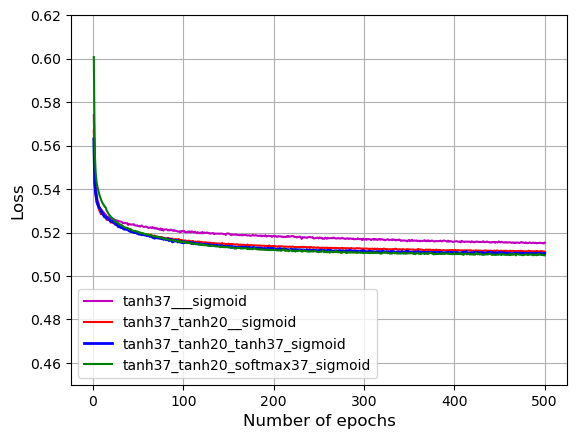

In [82]:
# Plot the loss
x = history1_df.index
plt.plot(x, history1_df['loss'], label=legend1, c='m')
plt.plot(x, history2_df['loss'], label=legend2, c='r')
plt.plot(x, history3_df['loss'], label=legend3, c='b', lw=2)
plt.plot(x, history4_df['loss'], label=legend4, c='g')
plt.legend(loc='lower left')
plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.ylim([0.45, 0.62])
plt.grid()
# Save the figure.
plt.savefig(f'Data/LossCurve_DNN_{legend3}_{epochn}.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

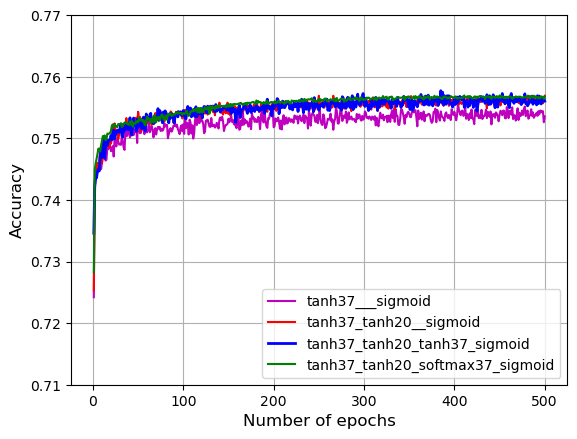

In [83]:
# # Plot the accuracy
plt.plot(x, history1_df['accuracy'], label=legend1, c='m')
plt.plot(x, history2_df['accuracy'], label=legend2, c='r')
plt.plot(x, history3_df['accuracy'], label=legend3, c='b', lw=2)
plt.plot(x, history4_df['accuracy'], label=legend4, c='g')
plt.legend(loc='lower right')
plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0.71, 0.77])
plt.grid()
# Save the figure.
plt.savefig(f'Data/AccuracyCurve_DNN_{legend3}_{epochn}.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

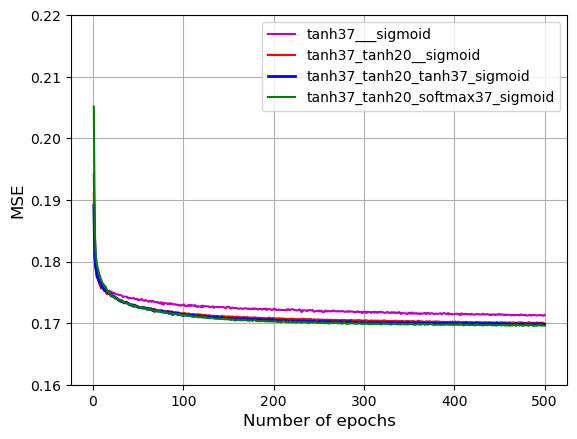

In [81]:
# # Plot the MSE
plt.plot(x, history1_df['mse'], label=legend1, c='m')
plt.plot(x, history2_df['mse'], label=legend2, c='r')
plt.plot(x, history3_df['mse'], label=legend3, c='b', lw=2)
plt.plot(x, history4_df['mse'], label=legend4, c='g')
plt.legend(loc='upper right')
plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.ylim([0.16, 0.22])
plt.grid()
# Save the figure.
plt.savefig(f'Data/MSECurve_DNN_{legend3}_{epochn}.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()